In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 125)

In [3]:
data = pd.read_csv("data/Sample_PFF_Data.csv")


In [4]:
data = data.loc[(data.RUNPASS == 'P') | (data.RUNPASS == 'R') ]
data = data.query("DOWN != 0").reset_index(drop=True)


In [5]:
data.shape

(19739, 96)

In [7]:
data.columns

Index(['2MINUTE', 'CENTERPASSBLOCKDIRECTION', 'CLOCK', 'DEFENSIVELINESHIFT',
       'DEFPERSONNEL', 'DEFSCORE', 'DEFSUBSTITUTIONS', 'DefTeam',
       'DEFTIMEOUTSREMAINING', 'DISTANCE', 'DOWN', 'DRIVE', 'DRIVEENDEVENT',
       'DRIVEENDFIELDPOSITION', 'DRIVEENDPLAYNUMBER', 'DRIVEPLAY',
       'DRIVESTARTEVENT', 'DRIVESTARTFIELDPOSITION', 'DROPBACKDEPTH',
       'DROPBACKTYPE', 'FIELDPOSITION', 'FORCEDFUMBLE', 'FUMBLE', 'FUMBLELOST',
       'GAINLOSS', 'GAINLOSSNET', 'GAMEID', 'GARBAGETIME', 'HASH', 'HASHDEF',
       'HIT', 'HURRY', 'INTERCEPTION', 'KICKYARDS', 'MOFOCPLAYED',
       'MOFOCSHOWN', 'NEXTPLAYID', 'NOHUDDLE', 'NOPLAY',
       'OFFFORMATIONUNBALANCED', 'OFFPERSONNELBASIC', 'OFFSCORE',
       'OFFSUBSTITUTIONS', 'OffTeam', 'OFFTIMEOUTSREMAINING', 'OPERATIONTIME',
       'OPTION', 'PASSBREAKUP', 'PASSDEPTH', 'PASSDIRECTION',
       'PASSRECEIVERPOSITIONTARGET', 'PASSRESULT', 'PASSRUSHRESULT',
       'PASSWIDTH', 'PENALTY', 'PENALTYYARDS', 'PISTOL', 'PLAYACTION',
       'PLAYAC

In [8]:
baseline_pass_rate = data.RUNPASS.map({"P":1, "R":0}).mean() 
print(f"Pass = {round(baseline_pass_rate*100, 1)}% of the time")

Pass = 61.2% of the time


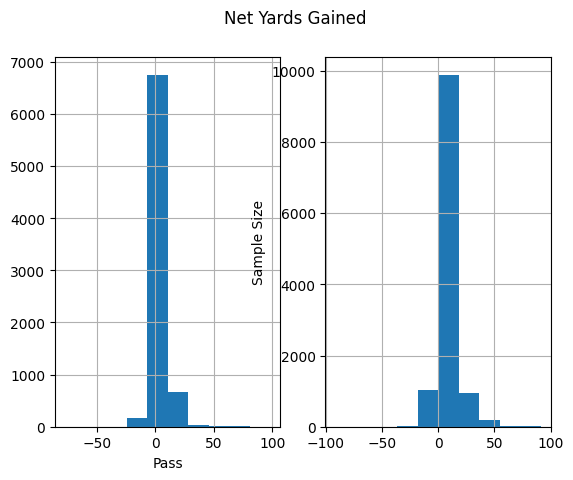

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)
data.query("RUNPASS == 'R'").GAINLOSSNET.hist(ax=ax1)
data.query("RUNPASS == 'P'").GAINLOSSNET.hist(ax=ax2)
fig.suptitle("Net Yards Gained")
ax1.set_xlabel("Run")
ax1.set_xlabel("Pass")
plt.ylabel("Sample Size")
plt.savefig("images/net_yards_dist_run_vs_pass.png")
plt.show()

<Axes: >

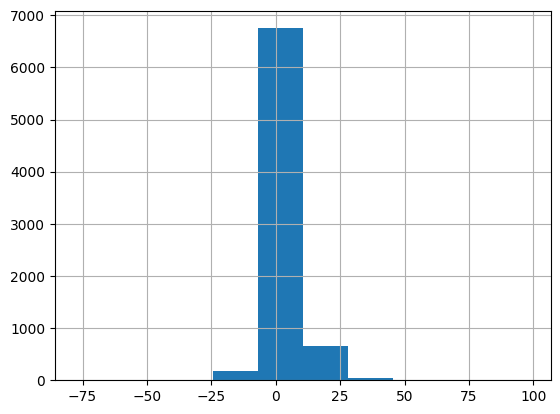

In [10]:
data.query("RUNPASS == 'R'").GAINLOSSNET.hist()

<Axes: >

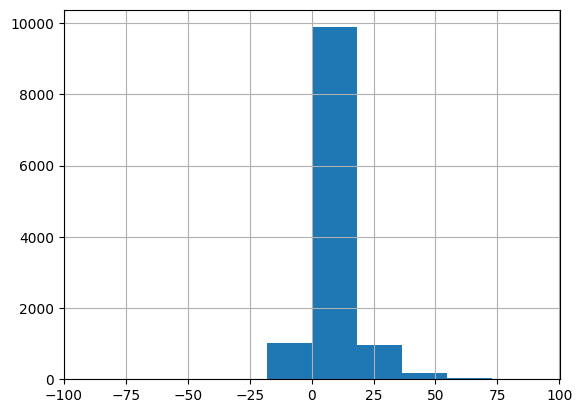

In [11]:
data.query("RUNPASS == 'P'").GAINLOSSNET.hist()

In [8]:
data.query("PENALTY == 1 ").RUNPASS.value_counts()


RUNPASS
P    990
R    310
Name: count, dtype: int64

In [13]:
corr_df = data.corr(numeric_only=True)
corr_df.style.background_gradient(cmap='coolwarm')

/Users/scottmaran/.pyenv/versions/3.8.18/envs/titans_run_pass/lib/python3.8/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/scottmaran/.pyenv/versions/3.8.18/envs/titans_run_pass/lib/python3.8/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,2MINUTE,DEFENSIVELINESHIFT,DEFSCORE,DEFSUBSTITUTIONS,DEFTIMEOUTSREMAINING,DISTANCE,DOWN,DRIVE,DRIVEENDFIELDPOSITION,DRIVEENDPLAYNUMBER,DRIVEPLAY,DRIVESTARTFIELDPOSITION,DROPBACKDEPTH,FIELDPOSITION,FORCEDFUMBLE,FUMBLE,FUMBLELOST,GAINLOSS,GAINLOSSNET,GAMEID,GARBAGETIME,HIT,HURRY,INTERCEPTION,KICKYARDS,NEXTPLAYID,NOHUDDLE,NOPLAY,OFFFORMATIONUNBALANCED,OFFSCORE,OFFSUBSTITUTIONS,OFFTIMEOUTSREMAINING,OPERATIONTIME,OPTION,PASSBREAKUP,PASSDEPTH,PASSWIDTH,PENALTY,PENALTYYARDS,PLAYACTION,PLAYACTIONFAKE,PLAYCLOCK,PLAYENDFIELDPOSITION,PLAYID,PREVIOUSPFFPLAYID,PUMPFAKE,QBMOVEDOFFSPOT,QBPRESSURE,QBRESET,QUARTER,RBSINBACKFIELD,RETURNYARDS,RUNPASSOPTION,SACK,SCORE,SCOREDIFFERENTIAL,SCREEN,SHIFTMOTION,SNAPTIME,SORTORDER,SPOTLEFT,STUNT,TACKLE,TEMPO,TIMETOPRESSURE,TIMETOTHROW,TOUCHDOWN,TRICKLOOK,TRICKPLAY,WEEK,YARDSAFTERCATCH,YARDSAFTERCONTACT
2MINUTE,1.000000,nan,0.219304,-0.100423,-0.392665,0.006118,0.011666,0.310761,0.062584,-0.015642,0.016116,0.063918,0.070491,0.039143,-0.008519,-0.008619,-0.010277,-0.007462,-0.006571,-0.049773,-0.046382,0.009736,0.018248,0.015473,nan,-0.048517,0.063473,-0.003297,-0.002659,0.293005,-0.146334,-0.417511,nan,-0.011048,0.007612,0.021393,0.037336,-0.004136,0.048721,-0.113725,-0.111773,0.078134,0.037729,-0.049496,-0.049494,-0.000438,0.022221,0.015938,0.004659,0.263421,0.030111,nan,-0.037409,-0.010114,0.260009,0.053516,-0.044025,-0.111638,nan,0.344296,0.005104,0.070782,-0.033721,nan,-0.011665,0.020616,-0.026452,-0.060921,-0.015462,-0.008866,-0.047906,-0.019069
DEFENSIVELINESHIFT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DEFSCORE,0.219304,nan,1.000000,-0.080023,-0.271692,0.018928,0.009512,0.699153,0.009681,0.035251,0.020049,-0.052961,0.089095,-0.015169,0.003149,-0.002399,-0.002966,0.021844,0.006927,-0.057218,0.250235,0.039487,0.055873,0.020272,nan,-0.061790,0.136709,0.018852,-0.007499,0.410464,-0.156709,-0.252147,nan,-0.021994,0.035636,0.024104,0.015826,0.014368,0.056035,-0.074991,-0.076311,0.154403,-0.012093,-0.061707,-0.061704,0.007459,0.040705,0.067410,0.000400,0.692623,-0.023387,nan,-0.048128,0.017591,0.703567,-0.581655,-0.033472,-0.159331,nan,0.741067,0.013815,0.097369,-0.064476,nan,-0.017344,0.014567,-0.001908,-0.081995,-0.041322,-0.047568,-0.043858,-0.010135
DEFSUBSTITUTIONS,-0.100423,nan,-0.080023,1.000000,0.087108,0.090619,-0.078677,-0.065755,-0.022476,-0.030447,-0.045430,-0.008535,0.000532,-0.004029,0.000126,-0.002688,0.004145,0.015325,0.015529,0.005954,-0.064296,0.004073,-0.009410,0.002374,nan,0.003034,-0.221842,-0.030832,0.007814,-0.028276,0.405613,0.080799,nan,-0.009015,-0.008801,0.016647,-0.010054,-0.023598,-0.031911,0.013115,0.009041,-0.139653,-0.018903,0.003353,0.003348,-0.005173,0.005398,-0.006537,-0.001521,-0.056439,0.008428,nan,-0.033124,0.007687,-0.050520,0.050622,0.013971,0.102087,nan,-0.078267,-0.008723,0.010756,0.023832,nan,0.022785,0.008760,-0.000904,0.022510,-0.002624,-0.008056,0.017963,0.026348
DEFTIMEOUTSREMAINING,-0.392665,nan,-0.271692,0.087108,1.000000,-0.021023,-0.032882,-0.302024,-0.058080,0.063265,-0.047156,-0.033761,-0.054943,-0.045721,0.002577,0.001125,0.003532,0.038854,0.033620,-0.013063,-0.171311,-0.014606,-0.015602,-0.001921,nan,-0.009525,-0.033416,-0.006794,0.005719,-0.236622,0.123660,0.354214,nan,0.028117,-0.011124,-0.020235,-0.015006,-0.008760,-0.025620,0.097294,0.098719,-0.104294,-0.040471,-0.007942,-0.007945,-0.004595,-0.021838,-0.017252,-0.005020,-0.257743,-0.155239,nan,0.059855,0.000413,-0.281449,0.046433,0.032354,0.129506,nan,-0.336074,-0.006313,-0.056359,0.098809,nan,0.001717,-0.014642,-0.008408,0.057547,0.009764,0.021583,0.036882,0.047161
DISTANCE,0.006118,nan,0.018928,0.090619,-0.021023,1.000000,-0.347473,0.025708,-0.019226,-0.099681,-0.125732,-0.020769,0.111294,-0.030558,0.011466,0.007127,0.008293,0.091109,0.065945,0.009849,

In [ ]:
''' 
Pistol formation and # of defensivebacks very correlated

historical_OFFPERSONNEL_3+ and historical_play_action inversely correlated. 
historical_OFFPERSONNEL_3+ correlated with historical_time_to_pressure

'''

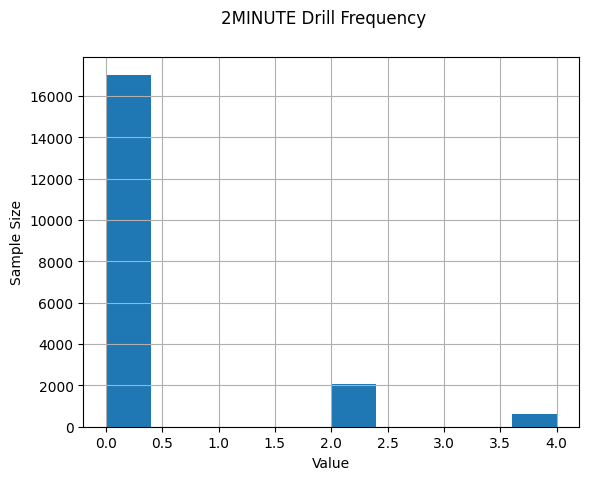

In [36]:


fig, ax = plt.subplots()
data['2MINUTE'].hist()
fig.suptitle("2MINUTE Drill Frequency")
plt.xlabel("Value")
plt.ylabel("Sample Size")
plt.savefig("images/two_minute_distribution.png")
plt.show()

<BarContainer object of 3 artists>

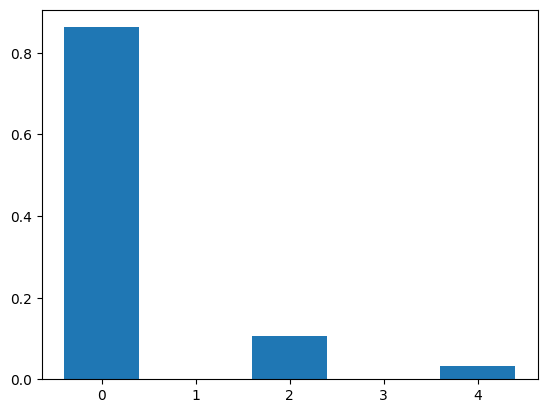

In [33]:
plt.bar(data['2MINUTE'].value_counts(normalize=True).index, data['2MINUTE'].value_counts(normalize=True).values)

In [9]:
data[data['2MINUTE'] != 0].RUNPASS.value_counts()

RUNPASS
P    2007
R     701
Name: count, dtype: int64

In [37]:
data[data['2MINUTE'] != 0].RUNPASS.value_counts(normalize=True)

RUNPASS
P    0.741137
R    0.258863
Name: proportion, dtype: float64

In [10]:
data[data['2MINUTE'] == 4].head()

,2MINUTE,CENTERPASSBLOCKDIRECTION,CLOCK,DEFENSIVELINESHIFT,DEFPERSONNEL,DEFSCORE,DEFSUBSTITUTIONS,DefTeam,DEFTIMEOUTSREMAINING,DISTANCE,DOWN,DRIVE,DRIVEENDEVENT,DRIVEENDFIELDPOSITION,DRIVEENDPLAYNUMBER,DRIVEPLAY,DRIVESTARTEVENT,DRIVESTARTFIELDPOSITION,DROPBACKDEPTH,DROPBACKTYPE,FIELDPOSITION,FORCEDFUMBLE,FUMBLE,FUMBLELOST,GAINLOSS,GAINLOSSNET,GAMEID,GARBAGETIME,HASH,HASHDEF,HIT,HURRY,INTERCEPTION,KICKYARDS,MOFOCPLAYED,MOFOCSHOWN,NEXTPLAYID,NOHUDDLE,NOPLAY,OFFFORMATIONUNBALANCED,OFFPERSONNELBASIC,OFFSCORE,OFFSUBSTITUTIONS,OffTeam,OFFTIMEOUTSREMAINING,OPERATIONTIME,OPTION,PASSBREAKUP,PASSDEPTH,PASSDIRECTION,PASSRECEIVERPOSITIONTARGET,PASSRESULT,PASSRUSHRESULT,PASSWIDTH,PENALTY,PENALTYYARDS,PISTOL,PLAYACTION,PLAYACTIONFAKE,PLAYCLOCK,PLAYENDFIELDPOSITION,PLAYID,POAACTUAL,POAINTENDED,PREVIOUSPFFPLAYID,PUMPFAKE,QBMOVEDOFFSPOT,QBPRESSURE,QBRESET,QUARTER,RBDIRECTION,RBSINBACKFIELD,RETURNYARDS,RUNPASS,RUNPASSOPTION,SACK,SCORE,SCOREDIFFERENTIAL,SCREEN,SHIFTMOTION,SHOTGUN,SNAPTIME,SORTORDER,SPOTLEFT,STUNT,TACKLE,TEALIGNMENT,TEMPO,TIMETOPRESSURE,TIMETOTHROW,TOUCHDOWN,TRICKLOOK,TRICKPLAY,WEEK,YARDSAFTERCATCH,YARDSAFTERCONTACT
127,4,NaN,05:55,0,10 Men,23,1,Team_23,3,10,1,9.0,TOUCHDOWN,0.0,6.0,1.0,KICKOFF -,-25.0,NaN,NaN,-25,0,0,0,4.0,4,18548,0,C,C,0,0,0,NaN,C,C,3528448.0,0,0,0,22,28,1,Team_3,2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,15.0,-29,3528446,ML,ML,3528444.0,0,0,0,0,4,L,2.0,NaN,R,0,0,28.23,5,0,1,NaN,NaN,153,27,0,1,L;R,0,NaN,NaN,0,0,0,2,NaN,3.0
128,4,NaN,05:11,0,4-2-5,23,1,Team_23,3,6,2,9.0,TOUCHDOWN,0.0,6.0,2.0,KICKOFF -,-25.0,NaN,NaN,-29,0,0,0,26.0,26,18548,0,L,R,0,0,0,NaN,C,C,3528449.0,0,0,0,11,28,1,Team_3,2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,3.0,45,3528448,LG,LG,3528446.0,0,0,0,0,4,L,1.0,NaN,R,0,0,28.23,5,0,1,NaN,NaN,154,24,0,1,R,0,NaN,NaN,0,1,0,2,NaN,15.0
129,4,NaN,04:23,0,6-2-3,23,1,Team_23,3,10,1,9.0,TOUCHDOWN,0.0,6.0,3.0,KICKOFF -,-25.0,NaN,NaN,45,0,0,0,33.0,33,18548,0,L,R,0,0,0,NaN,C,C,3528452.0,0,0,0,22,28,1,Team_3,2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,1.0,12,3528449,RT,RT,3528448.0,0,0,0,0,4,R,2.0,NaN,R,0,0,28.23,5,0,1,NaN,NaN,155,24,0,1,L;R,0,NaN,NaN,0,0,0,2,NaN,28.0
130,4,NaN,04:10,0,5-2-4,23,1,Team_23,2,10,1,9.0,TOUCHDOWN,0.0,6.0,4.0,KICKOFF -,-25.0,NaN,NaN,12,0,0,0,1.0,1,18548,0,R,L,0,0,0,NaN,C,C,3528454.0,0,0,0,12,28,1,Team_3,2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,15.0,11,3528452,LT,LT,3528449.0,0,0,0,0,4,L,1.0,NaN,R,0,0,28.23,5,0,1,NaN,NaN,156,29,0,1,L;L;L,0,NaN,NaN,0,0,0,2,NaN,0.0
131,4,NaN,04:06,0,4-2-5,23,1,Team_23,1,9,2,9.0,TOUCHDOWN,0.0,6.0,5.0,KICKOFF -,-25.0,NaN,NaN,11,0,0,0,10.0,10,18548,0,R,L,0,0,0,NaN,C,C,3528458.0,0,0,0,11,28,1,Team_3,2,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,1,3528454,RT,RT,3528452.0,0,0,0,0,4,R,1.0,NaN,R,0,0,28.23,5,0,0,NaN,NaN,157,29,0,1,R,0,NaN,NaN,0,0,0,2,NaN,10.0


In [11]:
data.OPTION.value_counts(normalize=True)

OPTION
0    0.965601
1    0.034399
Name: proportion, dtype: float64

In [12]:
data.query("OPTION == 1").RUNPASS.value_counts()

RUNPASS
R    679
Name: count, dtype: int64

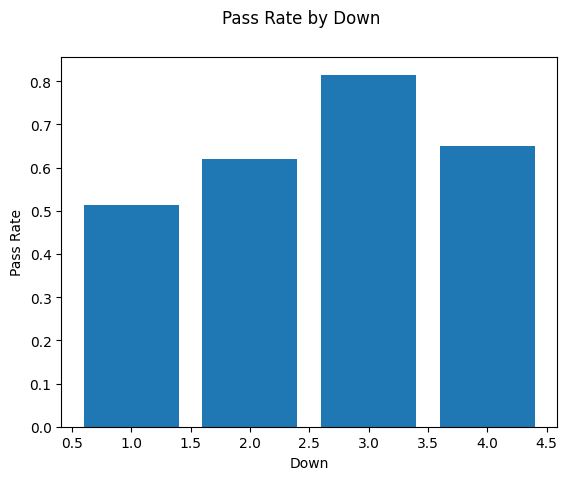

In [13]:
fig, ax = plt.subplots()
x = data.DOWN.unique()
y = [data.query("DOWN == @down").RUNPASS.map({"P":1, "R":0}).mean() for down in x]
ax.bar(x,y)
fig.suptitle("Pass Rate by Down")
plt.xlabel("Down")
plt.ylabel("Pass Rate")
plt.savefig("images/pass_rate_by_down_bar_chart.png")
plt.show()

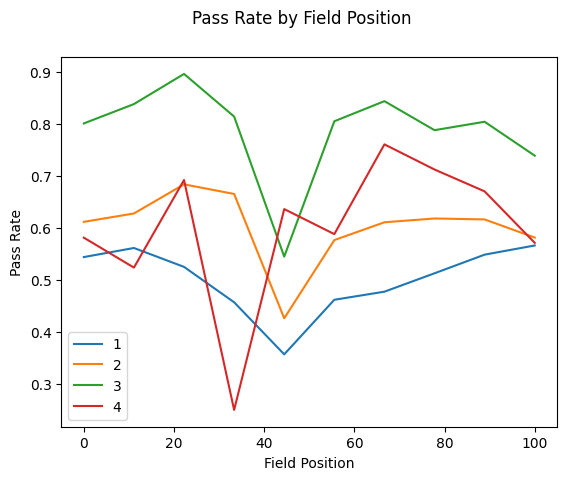

In [14]:
fig, ax = plt.subplots()
downs = data.DOWN.unique()
field_positions = np.linspace(-50, 50,10)
for down in downs:
    down_df = data[data.DOWN == down]
    y = [down_df.query("FIELDPOSITION >= @fp and FIELDPOSITION <= (@fp + 10)").RUNPASS.map({"P":1, "R":0}).mean() for fp in field_positions]
    plt.plot(field_positions + 50, y, label=f"{down}")
plt.legend()
fig.suptitle("Pass Rate by Field Position")
plt.xlabel("Field Position")
plt.ylabel("Pass Rate")
plt.savefig("images/pass_rate_by_field_pos_line_chart.png")
plt.show()

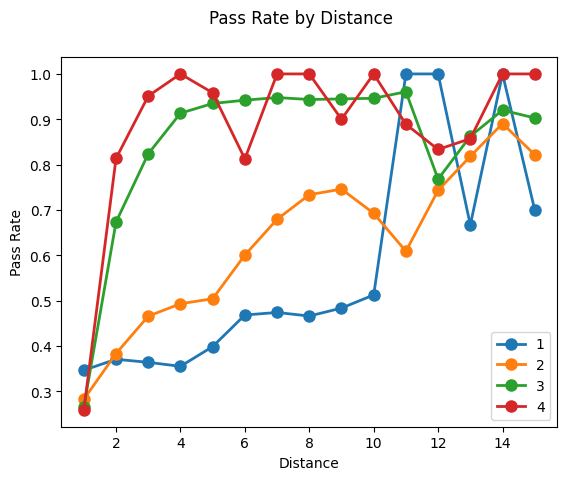

In [16]:
fig, ax = plt.subplots()

downs = data.DOWN.unique()
distances = np.sort(data.DISTANCE.unique())[0:15]
for down in downs:
    down_df = data[data.DOWN == down]
    y = [down_df.query("DISTANCE == @dist").RUNPASS.map({"P":1, "R":0}).mean() for dist in distances]
    widths = np.array([down_df.query("DISTANCE == @dist").shape[0] for dist in distances])
    # #widths = widths/max(widths)
    ax.plot(distances, y, marker='o', linewidth=2, markersize=8,  label=f"{down}")
    
fig.suptitle("Pass Rate by Distance")

plt.legend()
plt.xlabel("Distance")
plt.ylabel("Pass Rate")
plt.savefig("images/pass_rate_by_distances_line_chart.png")
plt.show()

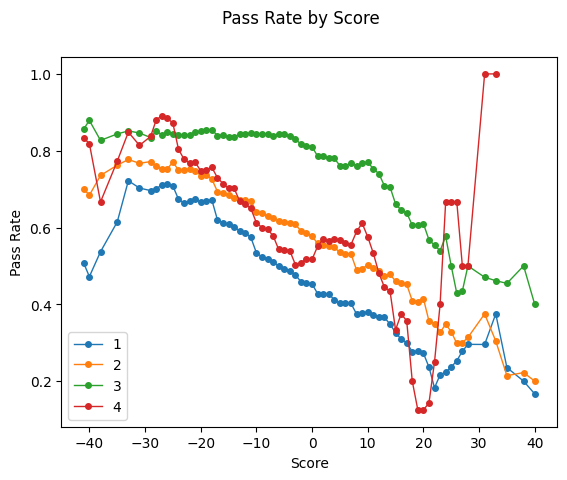

In [25]:
fig, ax = plt.subplots()

downs = data.DOWN.unique()
#scores = np.linspace(-40,40,9)
scores = np.sort(data.SCOREDIFFERENTIAL.unique())
for down in downs:
    down_df = data[data.DOWN == down]
    #y = [down_df.query("SCOREDIFFERENTIAL == @score").RUNPASS.map({"P":1, "R":0}).mean() for score in scores]
    y = [down_df.query("SCOREDIFFERENTIAL >= @score and SCOREDIFFERENTIAL <= (@score + 10)").RUNPASS.map({"P":1, "R":0}).mean() for score in scores]
    
    ax.plot(scores, y, marker='o', linewidth=1, markersize=4,  label=f"{down}")
    #plt.plot(scores, y, label=f"{down}")
fig.suptitle("Pass Rate by Score")

plt.legend()
plt.xlabel("Score")
plt.ylabel("Pass Rate")
plt.savefig("images/pass_rate_by_score_line_chart.png")
plt.show()

In [9]:
# decided to group all 3-RB sets together since had similar Run vs Pass rates (and all had low sample sizes)
def convert_off_personnel(personnel_str):
    new_alignment = personnel_str[0:2]
    if new_alignment[0] == '3':
        new_alignment = '3+'
    if new_alignment == 'Un':
        new_alignment = np.nan
    return new_alignment

In [10]:
# just return nans for values like (10 men, X-X-X)
def convert_def_personnel(personnel_str):
    try:
        num_lineman = int(personnel_str[0])
        num_linebackers = int(personnel_str[2])
        num_defensivebacks = int(personnel_str[4])
    except:
        num_lineman = np.nan 
        num_linebackers = np.nan 
        num_defensivebacks = np.nan
    return pd.Series([num_lineman, num_linebackers, num_defensivebacks])


In [22]:
data['DEFPERSONNEL'].unique().shape

(39,)

In [14]:
data['OFFPERSONNELBASIC'].unique().shape

(40,)

In [12]:
data['OFFPERSONNELBASIC'].value_counts(normalize=True)

OFFPERSONNELBASIC
11          0.584021
12          0.193526
21          0.072091
13          0.038047
22          0.034146
10          0.019555
12 (*)      0.009828
01          0.008055
20          0.007650
11 (*)      0.007143
02          0.003496
11 (+Q)     0.003445
22 (*)      0.003344
23          0.002584
21 (*)      0.002280
Unknown     0.001115
13 (*)      0.001115
20 (*)      0.001013
10 (*)      0.000963
00          0.000912
12 (+Q)     0.000709
03          0.000709
11 (*+Q)    0.000557
10 (+Q)     0.000507
31          0.000456
12 (**)     0.000405
32          0.000355
21 (*+Q)    0.000304
13 (+Q)     0.000253
22 (+Q)     0.000253
21 (+Q)     0.000253
10 (**)     0.000203
14          0.000152
20 (+Q)     0.000152
12 (*+Q)    0.000101
30          0.000101
02 (+Q)     0.000051
01 (+Q)     0.000051
31 (*)      0.000051
22 (-Q)     0.000051
Name: proportion, dtype: float64

In [15]:
data[['num_linemen', 'num_linebackers', 'num_defensivebacks']] = data['DEFPERSONNEL'].apply(convert_def_personnel)

In [16]:
data['OFFPERSONNEL_SIMPLIFIED'] = data['OFFPERSONNELBASIC'].apply(convert_off_personnel)

In [19]:
data['OFFPERSONNEL_SIMPLIFIED'].value_counts(normalize=True)*100

OFFPERSONNEL_SIMPLIFIED
11    59.583101
12    20.479789
21     7.501141
13     3.945834
22     3.783537
10     2.125070
20     0.882487
01     0.811482
02     0.355024
23     0.258660
3+     0.096364
00     0.091292
03     0.071005
14     0.015215
Name: proportion, dtype: float64

In [46]:
data.query("OFFPERSONNEL_SIMPLIFIED == '01'").RUNPASS.value_counts()

RUNPASS
P    144
R     16
Name: count, dtype: int64

In [47]:
data.query("OFFPERSONNEL_SIMPLIFIED == '02'").RUNPASS.value_counts()

RUNPASS
P    67
R     3
Name: count, dtype: int64

In [ ]:
data.query("OFFPERSONNEL_SIMPLIFIED == '02'").RUNPASS.value_counts()

In [21]:
''' 
######################
Look at the non-binary features that we may include for tendencies:
DROPBACKTYPE, CENTERPASSBLOCKDIRECTION, DEFPERSONNEL, OFFPERSONNELBASIC, TEALIGNMENT, PASSRESULT

Personal groupings need to be cleaned/consolidated. TEAlignment tendencies might be useful because of number of TEs.

- 2 or more TEs strong probability of run
######################
'''
def report_non_binary_features(col_name, dataset):
    unique_vals = dataset[col_name].dropna().unique()
    count_dist = dataset[col_name].value_counts(normalize=True)
    print(f"Unique values = :\n {unique_vals}")
    print(f"Distribution of values = :\n {count_dist}")
    for val in unique_vals:
        val_conditioned_run_pass_distribution = dataset[dataset[col_name] == val].RUNPASS.value_counts()
        print(f"For {val}: {val_conditioned_run_pass_distribution}")

In [22]:
report_non_binary_features('OFFPERSONNEL_SIMPLIFIED', data)

Unique values = :
 ['11' '12' '21' '22' '13' '01' '00' '20' '10' '02' '23' '03' '3+' '14']
Distribution of values = :
 OFFPERSONNEL_SIMPLIFIED
11    0.595831
12    0.204798
21    0.075011
13    0.039458
22    0.037835
10    0.021251
20    0.008825
01    0.008115
02    0.003550
23    0.002587
3+    0.000964
00    0.000913
03    0.000710
14    0.000152
Name: proportion, dtype: float64
For 11: RUNPASS
P    8301
R    3447
Name: count, dtype: int64
For 12: RUNPASS
R    2039
P    1999
Name: count, dtype: int64
For 21: RUNPASS
R    842
P    637
Name: count, dtype: int64
For 22: RUNPASS
R    558
P    188
Name: count, dtype: int64
For 13: RUNPASS
R    476
P    302
Name: count, dtype: int64
For 01: RUNPASS
P    144
R     16
Name: count, dtype: int64
For 00: RUNPASS
P    15
R     3
Name: count, dtype: int64
For 20: RUNPASS
R    94
P    80
Name: count, dtype: int64
For 10: RUNPASS
P    312
R    107
Name: count, dtype: int64
For 02: RUNPASS
P    67
R     3
Name: count, dtype: int64
For 23: RUNPASS


In [11]:
report_non_binary_features('DROPBACKTYPE', data)



Unique values = :
 ['SD' 'RL' 'RR' 'SL' 'SR' 'RSR' 'STP' 'FF' 'RSL' 'RRL' 'WRP' 'RLR' 'BFP'
 'RBP']
Distribution of values = :
 DROPBACKTYPE
SD     0.831839
SR     0.058824
RR     0.040477
SL     0.033649
RL     0.014480
RSR    0.010942
RSL    0.003126
WRP    0.001645
FF     0.001316
BFP    0.001152
RRL    0.001070
STP    0.000658
RLR    0.000576
RBP    0.000247
Name: proportion, dtype: float64
For SD: RUNPASS
P    10111
Name: count, dtype: int64
For RL: RUNPASS
P    176
Name: count, dtype: int64
For RR: RUNPASS
P    492
Name: count, dtype: int64
For SL: RUNPASS
P    409
Name: count, dtype: int64
For SR: RUNPASS
P    715
Name: count, dtype: int64
For RSR: RUNPASS
P    133
Name: count, dtype: int64
For STP: RUNPASS
P    8
Name: count, dtype: int64
For FF: RUNPASS
P    16
Name: count, dtype: int64
For RSL: RUNPASS
P    38
Name: count, dtype: int64
For RRL: RUNPASS
P    13
Name: count, dtype: int64
For WRP: RUNPASS
P    20
Name: count, dtype: int64
For RLR: RUNPASS
P    7
Name: count, dty

In [23]:
report_non_binary_features('CENTERPASSBLOCKDIRECTION', data)


Unique values = :
 ['L' 'R' 'C']
Distribution of values = :
 CENTERPASSBLOCKDIRECTION
L    0.425975
R    0.409710
C    0.164315
Name: proportion, dtype: float64
For L: RUNPASS
P    5133
Name: count, dtype: int64
For R: RUNPASS
P    4937
Name: count, dtype: int64
For C: RUNPASS
P    1980
Name: count, dtype: int64


In [24]:
report_non_binary_features('DEFPERSONNEL', data)


Unique values = :
 ['4-2-5' '5-2-4' '4-3-4' '3-2-6' '6-3-2' '5-1-5' '6-2-3' '10 Men' '3-3-5'
 '0-3-8' '4-1-6' '2-3-6' '2-4-5' '3-4-4' '1-3-7' '2-5-4' '4-4-3' '1-4-6'
 'X-X-X' '5-4-2' '4-5-2' '1-5-5' '3-5-3' '2-2-7' '5-3-3' '3-1-7' '12 Men'
 '5-0-6' '5-5-1' '0-6-5' '4-0-7' '1-2-8' '1-3-5 (OO)' '2-1-8' '3-0-8'
 '6-1-4' '6-4-1' '0-5-6' '4-6-1']
Distribution of values = :
 DEFPERSONNEL
4-2-5         0.312630
2-4-5         0.157455
4-3-4         0.117281
3-3-5         0.111404
3-4-4         0.097168
2-3-6         0.054663
4-1-6         0.046659
3-2-6         0.031309
5-2-4         0.018187
1-4-6         0.015300
1-5-5         0.006333
4-4-3         0.006029
5-1-5         0.003749
3-5-3         0.002432
5-3-3         0.002128
3-1-7         0.002077
2-2-7         0.002026
2-5-4         0.002026
1-3-7         0.001520
10 Men        0.001419
6-2-3         0.001419
6-3-2         0.001368
4-5-2         0.000760
5-4-2         0.000709
X-X-X         0.000608
0-6-5         0.000608
4-0-7         0.0

In [65]:
report_non_binary_features('TEALIGNMENT', data)


Unique values = :
 ['R' 'L;L' 'L' 'L;R' 'L;R;R' 'L;L;R;R' 'R;R' 'L;L;R' 'L;L;L' 'R;R;R'
 'L;L;L;R' 'L;R;R;R']
Distribution of values = :
 TEALIGNMENT
R          0.384720
L          0.259758
L;R        0.122844
R;R        0.099622
L;L        0.066415
L;R;R      0.024660
L;L;R      0.017549
R;R;R      0.012632
L;L;L      0.009002
L;L;R;R    0.002042
L;R;R;R    0.000605
L;L;L;R    0.000151
Name: proportion, dtype: float64
For R: RUNPASS
P    2750
R    2234
X     102
Name: count, dtype: int64
For L;L: RUNPASS
R    566
P    299
X     13
Name: count, dtype: int64
For L: RUNPASS
P    1820
R    1535
X      79
Name: count, dtype: int64
For L;R: RUNPASS
R    1037
P     557
X      30
Name: count, dtype: int64
For L;R;R: RUNPASS
R    223
P     92
X     11
Name: count, dtype: int64
For L;L;R;R: RUNPASS
R    17
P    10
Name: count, dtype: int64
For R;R: RUNPASS
R    753
P    534
X     30
Name: count, dtype: int64
For L;L;R: RUNPASS
R    155
P     75
X      2
Name: count, dtype: int64
For L;L;L: RUNP

In [66]:
report_non_binary_features('PASSRESULT', data)

Unique values = :
 ['INCOMPLETE' 'COMPLETE' 'RUN' 'SACK' 'THROWN AWAY' 'SPIKE' 'INTERCEPTION'
 'HIT AS THREW' 'BATTED PASS' 'LATERAL']
Distribution of values = :
 PASSRESULT
COMPLETE        0.567668
INCOMPLETE      0.243768
SACK            0.055944
RUN             0.043850
THROWN AWAY     0.035623
INTERCEPTION    0.021637
BATTED PASS     0.015220
HIT AS THREW    0.011271
SPIKE           0.002962
LATERAL         0.002057
Name: proportion, dtype: float64
For INCOMPLETE: RUNPASS
P    2963
Name: count, dtype: int64
For COMPLETE: RUNPASS
P    6900
Name: count, dtype: int64
For RUN: RUNPASS
P    533
Name: count, dtype: int64
For SACK: RUNPASS
P    680
Name: count, dtype: int64
For THROWN AWAY: RUNPASS
P    433
Name: count, dtype: int64
For SPIKE: RUNPASS
P    36
Name: count, dtype: int64
For INTERCEPTION: RUNPASS
P    263
Name: count, dtype: int64
For HIT AS THREW: RUNPASS
P    137
Name: count, dtype: int64
For BATTED PASS: RUNPASS
P    185
Name: count, dtype: int64
For LATERAL: RUNPASS
P   

In [ ]:
''' 
#################
'''

In [13]:
data.DROPBACKTYPE.unique()

array([nan, 'SD', 'RL', 'RR', 'SL', 'SR', 'RSR', 'STP', 'FF', 'RSL',
       'RRL', 'WRP', 'RLR', 'BFP', 'RBP'], dtype=object)

In [14]:
data.DROPBACKTYPE.value_counts(normalize=True)

DROPBACKTYPE
SD     0.831839
SR     0.058824
RR     0.040477
SL     0.033649
RL     0.014480
RSR    0.010942
RSL    0.003126
WRP    0.001645
FF     0.001316
BFP    0.001152
RRL    0.001070
STP    0.000658
RLR    0.000576
RBP    0.000247
Name: proportion, dtype: float64

In [8]:
''' 
SNAPTIME - lot of NaNs
'''

' \nSNAPTIME - lot of NaNs\n'

In [17]:
pd.DataFrame(data.OffTeam.value_counts().sort_values()).T

OffTeam,Team_1,Team_22,Team_7,Team_8,Team_9,Team_12,Team_14,Team_29,Team_18,Team_25,Team_30,Team_21,Team_26,Team_3,Team_2,Team_23,Team_15,Team_5,Team_11,Team_13,Team_31,Team_4,Team_19,Team_16,Team_10,Team_27,Team_20,Team_24,Team_28,Team_32,Team_6,Team_17
count,616,643,652,676,691,699,701,729,731,741,741,744,744,757,763,767,768,773,785,789,795,800,802,804,808,816,820,825,830,831,834,847


<Axes: >

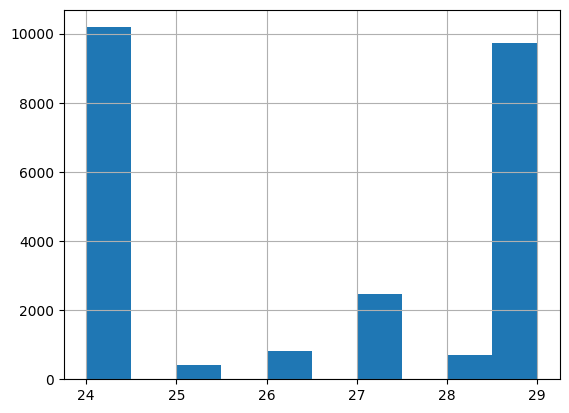

In [21]:
data.SPOTLEFT.hist()

In [7]:
data.head(100)

,2MINUTE,CENTERPASSBLOCKDIRECTION,CLOCK,DEFENSIVELINESHIFT,DEFPERSONNEL,DEFSCORE,DEFSUBSTITUTIONS,DefTeam,DEFTIMEOUTSREMAINING,DISTANCE,DOWN,DRIVE,DRIVEENDEVENT,DRIVEENDFIELDPOSITION,DRIVEENDPLAYNUMBER,DRIVEPLAY,DRIVESTARTEVENT,DRIVESTARTFIELDPOSITION,DROPBACKDEPTH,DROPBACKTYPE,FIELDPOSITION,FORCEDFUMBLE,FUMBLE,FUMBLELOST,GAINLOSS,GAINLOSSNET,GAMEID,GARBAGETIME,HASH,HASHDEF,HIT,HURRY,INTERCEPTION,KICKYARDS,MOFOCPLAYED,MOFOCSHOWN,NEXTPLAYID,NOHUDDLE,NOPLAY,OFFFORMATIONUNBALANCED,OFFPERSONNELBASIC,OFFSCORE,OFFSUBSTITUTIONS,OffTeam,OFFTIMEOUTSREMAINING,OPERATIONTIME,OPTION,PASSBREAKUP,PASSDEPTH,PASSDIRECTION,PASSRECEIVERPOSITIONTARGET,PASSRESULT,PASSRUSHRESULT,PASSWIDTH,PENALTY,PENALTYYARDS,PISTOL,PLAYACTION,PLAYACTIONFAKE,PLAYCLOCK,PLAYENDFIELDPOSITION,PLAYID,POAACTUAL,POAINTENDED,PREVIOUSPFFPLAYID,PUMPFAKE,QBMOVEDOFFSPOT,QBPRESSURE,QBRESET,QUARTER,RBDIRECTION,RBSINBACKFIELD,RETURNYARDS,RUNPASS,RUNPASSOPTION,SACK,SCORE,SCOREDIFFERENTIAL,SCREEN,SHIFTMOTION,SHOTGUN,SNAPTIME,SORTORDER,SPOTLEFT,STUNT,TACKLE,TEALIGNMENT,TEMPO,TIMETOPRESSURE,TIMETOTHROW,TOUCHDOWN,TRICKLOOK,TRICKPLAY,WEEK,YARDSAFTERCATCH,YARDSAFTERCONTACT
0,0,NaN,15:00,0,NaN,0,0,Team_3,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35,0,0,0,68.0,26,18548,0,C,C,0,0,0,68.0,NaN,NaN,3528152.0,0,0,0,NaN,0,0,Team_23,3,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,39,3528149,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,42.0,NaN,0,0,0.00,0,0,0,NaN,NaN,1,27,0,1,NaN,0,NaN,NaN,0,0,0,2,NaN,NaN
1,0,L,14:54,0,4-2-5,0,1,Team_3,3,10,1,1.0,FIELD GOAL,20.0,14.0,1.0,KICKOFF - RETURN,-39.0,8.0,SD,-39,0,0,0,NaN,0,18548,0,R,L,0,0,0,NaN,C,C,3528156.0,0,0,0,11,0,1,Team_23,3,NaN,0,0,33.0,L,LWR,INCOMPLETE,NaN,1.0,0,NaN,NaN,1,1,13.0,-39,3528152,NaN,NaN,3528149.0,0,0,0,0,1,NaN,1.0,NaN,P,0,0,0.00,0,0,1,S,NaN,2,29,0,0,R,0,NaN,2.7,0,0,0,2,NaN,NaN
2,0,L,14:49,0,4-2-5,0,0,Team_3,3,10,2,1.0,FIELD GOAL,20.0,14.0,2.0,KICKOFF - RETURN,-39.0,7.0,SD,-39,0,0,0,10.0,10,18548,0,R,L,0,0,0,NaN,C,C,3528157.0,0,0,0,11,0,1,Team_23,3,NaN,0,0,5.0,M,SRWR,COMPLETE,NaN,32.0,0,NaN,NaN,0,0,22.0,-49,3528156,NaN,NaN,3528152.0,0,0,0,0,1,NaN,NaN,NaN,P,0,0,0.00,0,0,0,S,NaN,3,29,1,1,NaN,0,NaN,1.7,0,0,0,2,5.0,4.0
3,0,NaN,14:09,0,4-2-5,0,0,Team_3,3,10,1,1.0,FIELD GOAL,20.0,14.0,3.0,KICKOFF - RETURN,-39.0,NaN,NaN,-49,0,0,0,2.0,2,18548,0,C,C,0,0,0,NaN,C,O,3528160.0,0,0,0,11,0,1,Team_23,3,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,6.0,49,3528157,ML,ML,3528156.0,0,0,0,0,1,L,1.0,NaN,R,0,0,0.00,0,0,0,S,NaN,4,28,0,1,R,0,NaN,NaN,0,0,0,2,NaN,2.0
4,0,R,13:37,0,4-2-5,0,0,Team_3,3,8,2,1.0,FIELD GOAL,20.0,14.0,4.0,KICKOFF - RETURN,-39.0,8.0,SD,49,0,0,0,3.0,3,18548,0,L,R,0,1,0,NaN,O,O,3528162.0,0,0,0,12,0,1,Team_23,3,NaN,0,0,3.0,M,RWR,COMPLETE,HURRY,33.0,0,NaN,NaN,0,0,NaN,46,3528160,NaN,NaN,3528157.0,0,0,1,0,1,NaN,1.0,NaN,P,0,0,0.00,0,0,0,S,NaN,5,24,0,1,L;L,0,2.6,2.6,0,0,0,2,0.0,0.0
5,0,C,12:56,0,4-2-5,0,1,Team_3,3,5,3,1.0,FIELD GOAL,20.0,14.0,5.0,KICKOFF - RETURN,-39.0,8.0,SD,46,0,0,0,7.0,7,18548,0,R,L,0,1,0,NaN,C,C,3528164.0,0,0,0,11,0,1,Team_23,3,NaN,0,0,0.0,X,NaN,RUN,HURRY,NaN,0,NaN,NaN,0,0,5.0,39,3528162,QB SCRAMBLE,QB SCRAMBLE,3528160.0,0,1,1,0,1,L,1.0,NaN,P,0,0,0.00,0,0,1,S,NaN,6,29,0,1,NaN,0,2.2,4.0,0,0,0,2,NaN,2.0
6,0,R,12:27,0,4-2-5,0,1,Team_3,3,10,1,1.0,FIELD GOAL,20.0,14.0,6.0,KICKOFF - RETURN,-39.0,5.0,SD,39,0,0,0,3.0,3,18548,0,L,R,0,0,0,NaN,C,C,3528165.0,0,0,0,11,0,0,Team_23,3,NaN,0,0,1.0,M,HB-L,COMPLETE,NaN,37.0,0,NaN,NaN,1,1,20.0,36,3528164,NaN,NaN,3528162.0,0,0,0,0,1,NaN,1.0,NaN,P,0,0,0.00,0,0,0,S,NaN,7,24,0,1,L,0,NaN,3.0,0,0,0,2,2.0,1.0
7,0,NaN,11:51,0,4-2-5,0,0,Team_3,3,7,2,1.0,FIELD GOAL,20.0,14.0,7.0,KICKOFF - RETURN,-39.0,NaN,NaN,36,0,0,0,5.0,5,18548,0,R,L,0,0,0,NaN,O,O,3528167.0,0,0,0,11,0,1,Team_23,3,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,11.0,31,3528165,ML,RT,3528164.0,0,0,0,0,1,R,1.0,NaN,R,1,0,0.00,0,0,0,S,NaN,8,29,0,1,R,0,NaN,NaN,0,0,0,2,NaN,9.0
8,0,NaN,11:09,0,4-2-5,0,0,Team_3,3,2,3,1.0,FIELD GOAL,20.0,14.0,8.0,KICKOFF - RETURN,-39.0,NaN,NaN,31,0,0,0,-2.0,-2,18548,0,C,C,0,0,0,NaN,C,C,3528169.0,0,0,0,11,0,1,Team_23,3,NaN,